# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
df = pd.read_csv('data/creditcard.csv') # Dataframe original
df_mod = pd.read_csv('data/df_mod.csv') # Dataframe com as variaveis extras

## Realizando balanceamento das variaveis

Uma vez que o número de transações fraudulentas é muito menor que o número de transações não-fraudulentas, é necessário realizar o balancemanto das variaveis, para isso, vamos aumentasr a quantidade de transações fraudulentas.

In [3]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

* A diferença é de cerca de 500x

In [4]:
# Definindo a proporcao entre os dados
prop = 5

# Definindo os Dataframes (original)
print('=== Balancemanto do Dataframe ORIGINAL (df) === \n')
fraude = df[df['Class'] == 1]
n_fraude = df[df['Class'] == 0]
print(f'Fraude: {fraude.shape}, Nao-Fraude {n_fraude.shape} \n')

# Aumentando (em prop vezes) o numero de observacoes no dataframe fraude
fraude = pd.concat([fraude] * prop, ignore_index=True)
print(f'Novo Fraude: {fraude.shape}')

# Definindo o numero de nao fraudes de forma aleatoria
n_fraude = n_fraude.sample(n = fraude.shape[0] * (prop), axis=0, random_state = 42)
print(f'Novo Nao Fraude: {n_fraude.shape} \n')

# Concatenando os dataframes novos e criando outro dataframe
print(f'Novo Dataframe balanceado com a proporcao de {prop} (nao-fraude) para 1 (fraude)')
df_balanced = pd.concat([fraude,n_fraude])
print(df_balanced['Class'].value_counts())
print()

# ==============================================================================

# Definindo os Dataframes (modificado)
print('=== Balancemanto do Dataframe MODIFICADO (df_mod) === \n')
fraude = df_mod[df_mod['Class'] == 1]
n_fraude = df_mod[df_mod['Class'] == 0]
print(f'Fraude: {fraude.shape}, Nao-Fraude {n_fraude.shape} \n')

# Aumentando (em prop vezes) o numero de observacoes no dataframe fraude
fraude = pd.concat([fraude] * prop, ignore_index=True)
print(f'Novo Fraude: {fraude.shape}')

# Definindo o numero de nao fraudes de forma aleatoria
n_fraude = n_fraude.sample(n = fraude.shape[0] * prop, axis=0, random_state = 1)
print(f'Novo Nao Fraude: {n_fraude.shape} \n')

# Concatenando os dataframes novos e criando outro dataframe
print(f'Novo Dataframe balanceado com a proporcao de {prop} (nao-fraude) para 1 (fraude)')
df_mod_balanced = pd.concat([fraude,n_fraude])
print(df_mod_balanced['Class'].value_counts())

=== Balancemanto do Dataframe ORIGINAL (df) === 

Fraude: (492, 31), Nao-Fraude (284315, 31) 

Novo Fraude: (2460, 31)
Novo Nao Fraude: (12300, 31) 

Novo Dataframe balanceado com a proporcao de 5 (nao-fraude) para 1 (fraude)
0    12300
1     2460
Name: Class, dtype: int64

=== Balancemanto do Dataframe MODIFICADO (df_mod) === 

Fraude: (492, 48), Nao-Fraude (284315, 48) 

Novo Fraude: (2460, 48)
Novo Nao Fraude: (12300, 48) 

Novo Dataframe balanceado com a proporcao de 5 (nao-fraude) para 1 (fraude)
0    12300
1     2460
Name: Class, dtype: int64


# Rodando Regressão Logística básica para comparar os resultados entre os Dataframes

### Dataframe ORIGINAL sem balanceamento (df)

=== Dataframe ORIGINAL, sem balanceamento === 



C:\Users\marce\tcc\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


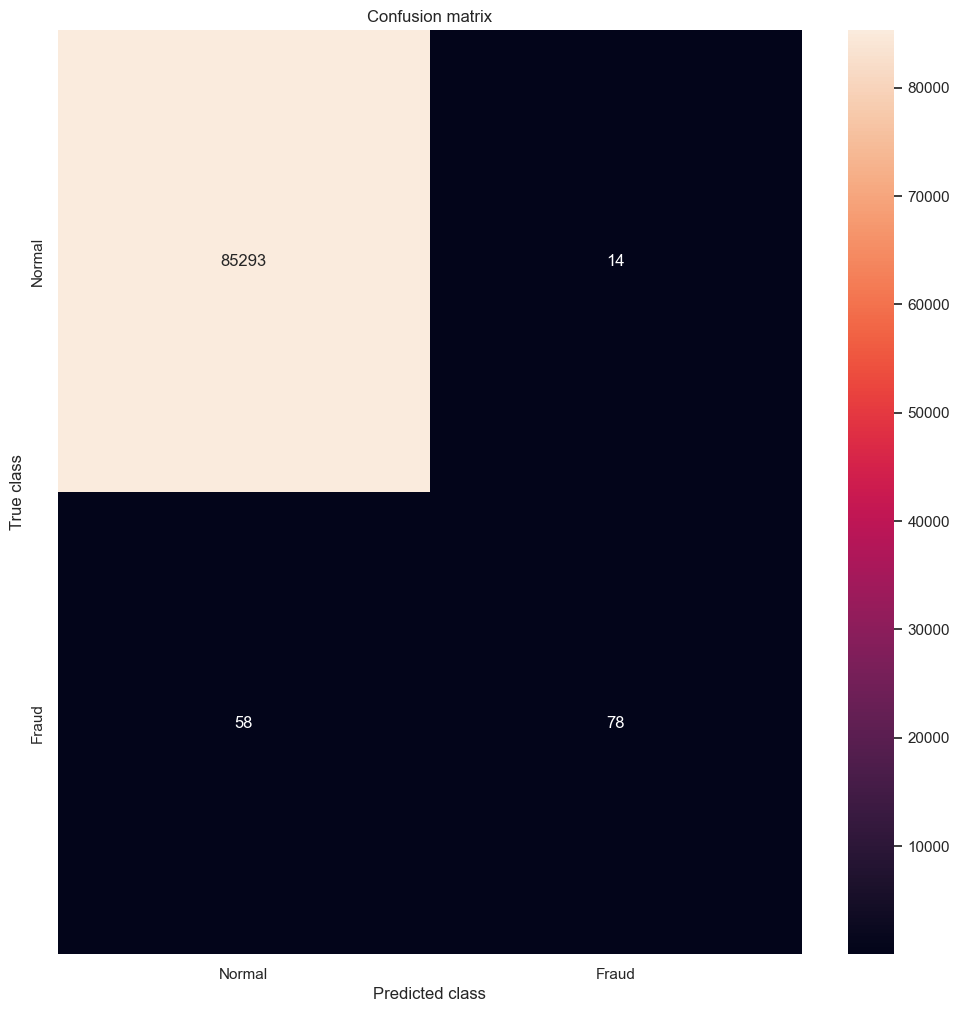

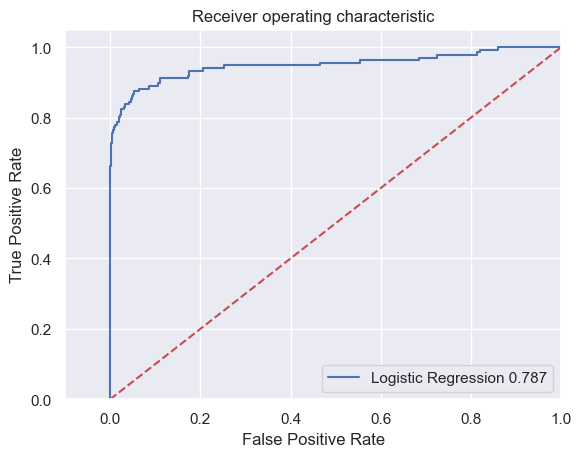

=== Dataframe ORIGINAL, sem balanceamento === 

A acurácia é 0.9991573329588147
A precisão é 0.8478260869565217
O recall é 0.5735294117647058
O Score é 0.6842105263157895
O coeficiente de correlação é 0.6969393294720038


In [5]:
# Definindo as variaveis explicativas e a variavel target
x = df.drop(['Class'],axis=1)
y = df['Class']

# Separando entre de treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 
logreg = LogisticRegression(max_iter=300) # Instanciando o modelo
logreg.fit(X_train, y_train)  # Treinando
y_pred = logreg.predict(X_test) # Predicao

# Calculando a matriz de confusão
from sklearn.metrics import confusion_matrix
print('=== Dataframe ORIGINAL, sem balanceamento === \n')
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Plotando a curva ROC e calculando a AUC
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression {round(logit_roc_auc, 3)}')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
MCC = matthews_corrcoef(y_test, y_pred)

print('=== Dataframe ORIGINAL, sem balanceamento === \n')
print(f'A acurácia é {accuracy}')
print(f'A precisão é {precision}')
print(f'O recall é {recall}')
print(f'O Score é {f1}')
print(f'O coeficiente de correlação é {MCC}')

## Dataframe ORIGINAL balanceado (df_balanced)

=== Dataframe ORIGINAL, balanceado === 



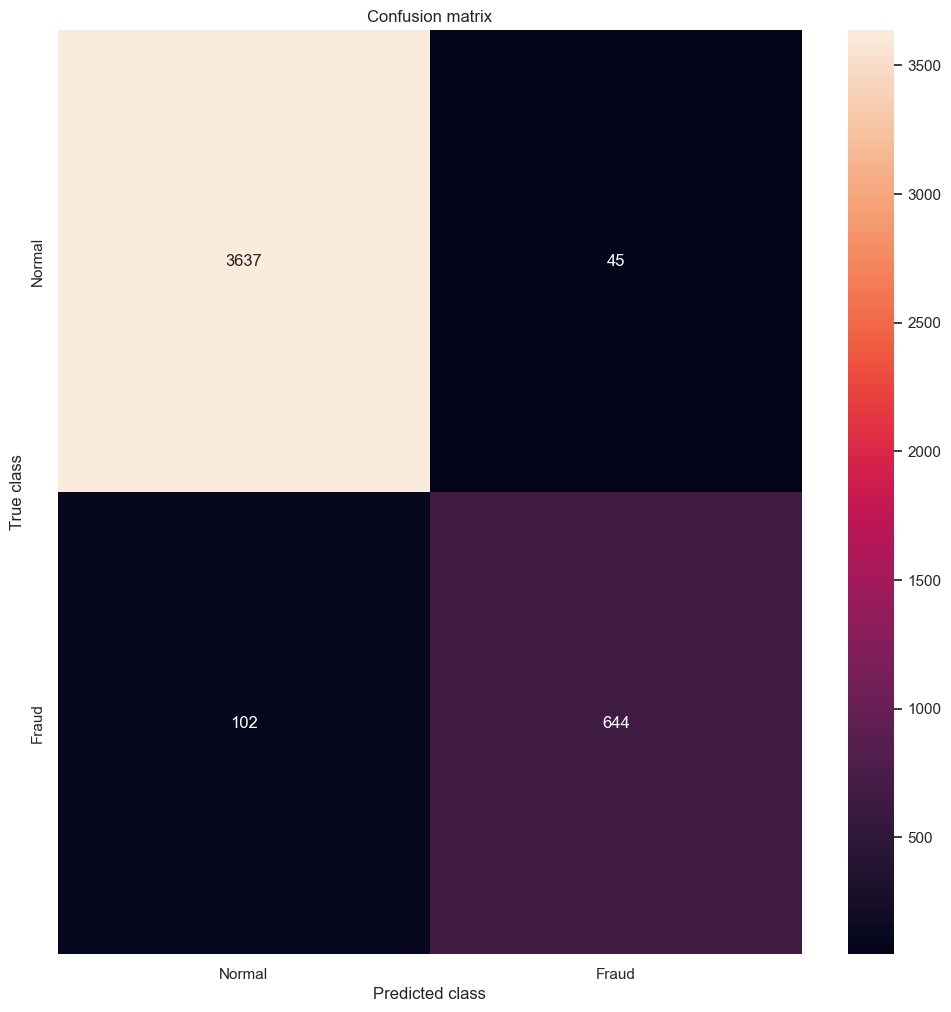

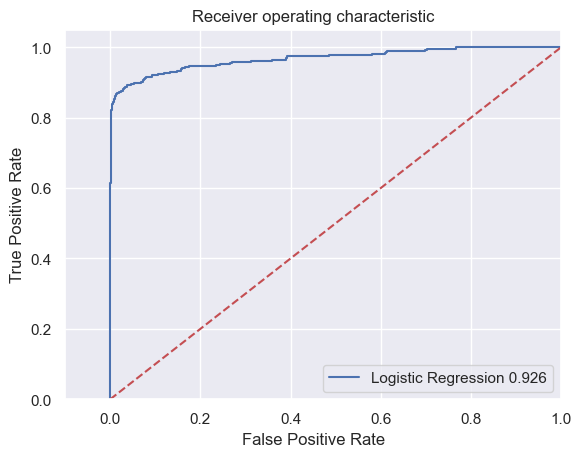

=== Dataframe ORIGINAL, balanceado === 

A precisão é 0.9668021680216802
A precisão é 0.9346879535558781
O recall é 0.8632707774798928
O Score é 0.897560975609756
O coeficiente de correlação é 0.8787768529882575


In [6]:
# Definindo as variaveis explicativas e a variavel target
x = df_balanced.drop(['Class'],axis=1)
y = df_balanced['Class']

# Separando entre de treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 
logreg = LogisticRegression(max_iter=300) # Instanciando o modelo
logreg.fit(X_train, y_train)  # Treinando
y_pred = logreg.predict(X_test) # Predicao

# Calculando a matriz de confusão
print('=== Dataframe ORIGINAL, balanceado === \n')
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


# Plotando a curva ROC e calculando a AUC
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression {round(logit_roc_auc, 3)}')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
MCC = matthews_corrcoef(y_test, y_pred)

print('=== Dataframe ORIGINAL, balanceado === \n')
print(f'A precisão é {accuracy}')
print(f'A precisão é {precision}')
print(f'O recall é {recall}')
print(f'O Score é {f1}')
print(f'O coeficiente de correlação é {MCC}')

## Dataframe MODIFICADO balanceado (df_mod_balanced)

=== Dataframe MODIFICADO, balanceado === 



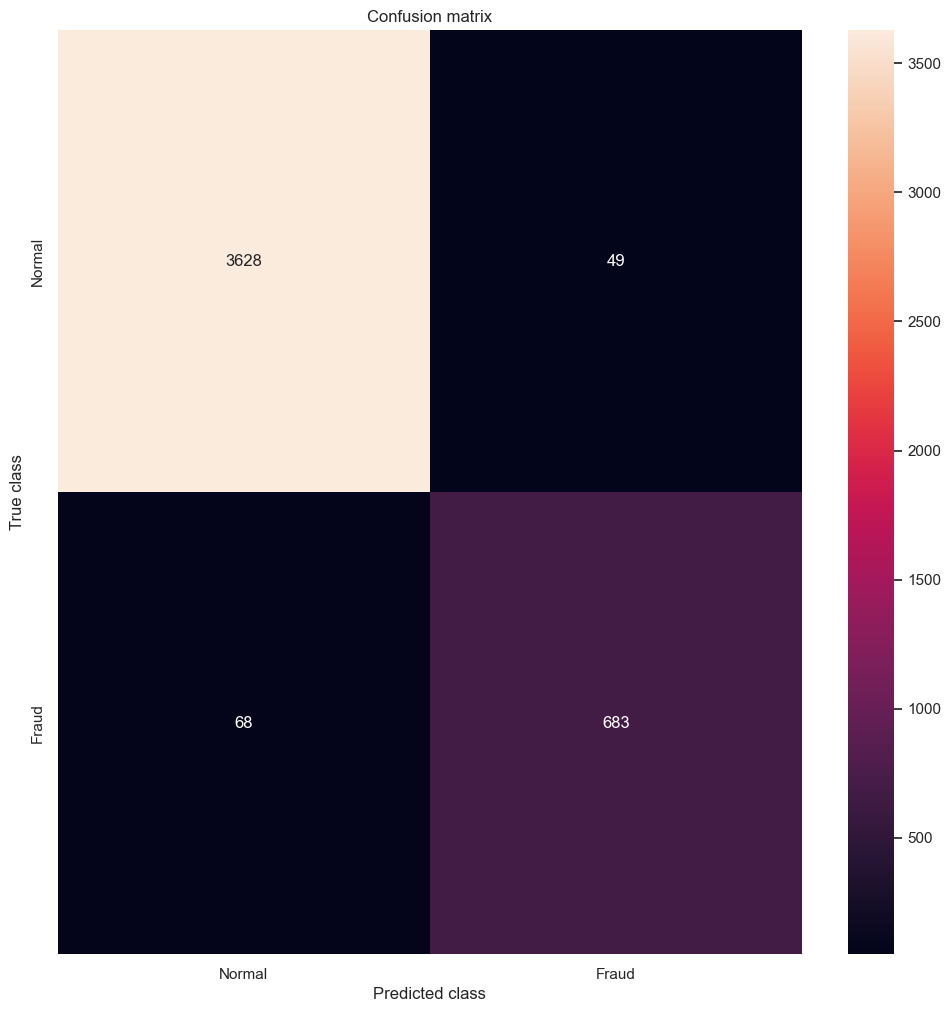

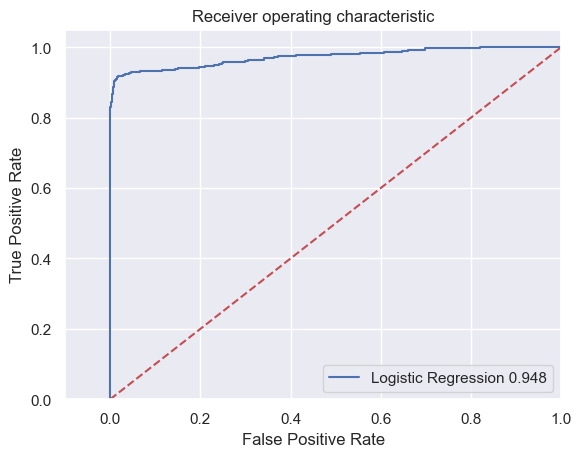

=== Dataframe MODIFICADO, balanceado === 

A acurácia é 0.9735772357723578
A precisão é 0.9330601092896175
O recall é 0.9094540612516645
O Score é 0.921105866486851
O coeficiente de correlação é 0.9053474846989344


In [7]:
# definindo as variaveis explicativas e a variavel target
x = df_mod_balanced.drop(['Class'],axis=1)
y = df_mod_balanced['Class']

# Separando entre de treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123) 
logreg = LogisticRegression(max_iter=300) # Instanciando o modelo
logreg.fit(X_train, y_train)  # Treinando
y_pred = logreg.predict(X_test) # Predicao

# calculando a matriz de confusão
from sklearn.metrics import confusion_matrix
print('=== Dataframe MODIFICADO, balanceado === \n')
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Plotando a curva ROC e calculando a AUC
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression {round(logit_roc_auc, 3)}')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
MCC = matthews_corrcoef(y_test, y_pred)

print('=== Dataframe MODIFICADO, balanceado === \n')
print(f'A acurácia é {accuracy}')
print(f'A precisão é {precision}')
print(f'O recall é {recall}')
print(f'O Score é {f1}')
print(f'O coeficiente de correlação é {MCC}')

CONCLUSÃO:
> O Dataframe modificado e balanceado é o mais representativo!!!

In [8]:
df_mod_balanced.to_csv('./data/df_final.csv', index=False)